In [83]:
import pandas as pd

# Dataset

### Sentences

In [84]:
data = pd.read_csv("data").set_index("Session_ID")

In [85]:
data.head()

,Time_Record,Transcription
Session_ID,,
Ses01F_impro01_F000,[006.2901-008.2357]:,Excuse me.
Ses01F_impro01_M000,[007.5712-010.4750]:,Do you have your forms?
Ses01F_impro01_F001,[010.0100-011.3925]:,Yeah.
Ses01F_impro01_M001,[010.9266-014.6649]:,Let me see them.
Ses01F_impro01_F002,[014.8872-018.0175]:,Is there a problem?


In [86]:
data.tail()

,Time_Record,Transcription
Session_ID,,
Ses05M_script03_2_M044,[255.8600-260.3300]:,oh! Marry you again? I wouldn't marry you agai...
Ses05M_script03_2_F042,[259.4500-260.4100]:,Beast
Ses05M_script03_2_M045,[260.3400-266.3500]:,You're a wicked little vampire. And I pray to...
Ses05M_script03_2_F043,[260.4200-261.4300]:,Brute
Ses05M_script03_2_F044,[261.9100-263.0700]:,pig


In [87]:
data.shape

(10239, 2)

### Targets

In [88]:
target = pd.read_csv("target").set_index("Session_ID")

In [89]:
target.head()

,Sentiment,Valence,Activation,Dominance
Session_ID,,,,
Ses01F_impro01_F000,neu,2.5,2.5,2.5
Ses01F_impro01_F001,neu,2.5,2.5,2.5
Ses01F_impro01_F002,neu,2.5,2.5,2.5
Ses01F_impro01_F003,xxx,2.5,3.0,3.0
Ses01F_impro01_F004,xxx,2.5,3.0,2.5


In [90]:
target.tail()

,Sentiment,Valence,Activation,Dominance
Session_ID,,,,
Ses05M_script03_2_M041,ang,1.0,4.5,5.0
Ses05M_script03_2_M042,ang,1.0,4.5,4.5
Ses05M_script03_2_M043,ang,1.5,4.0,4.5
Ses05M_script03_2_M044,ang,1.0,5.0,5.0
Ses05M_script03_2_M045,ang,1.0,5.0,5.0


In [91]:
target.shape

(10039, 4)

### Data merge

In [94]:
corpus = pd.merge(data, target, on='Session_ID')


In [95]:
corpus.head()

,Time_Record,Transcription,Sentiment,Valence,Activation,Dominance
Session_ID,,,,,,
Ses01F_impro01_F000,[006.2901-008.2357]:,Excuse me.,neu,2.5,2.5,2.5
Ses01F_impro01_M000,[007.5712-010.4750]:,Do you have your forms?,fru,2.5,2.0,2.5
Ses01F_impro01_F001,[010.0100-011.3925]:,Yeah.,neu,2.5,2.5,2.5
Ses01F_impro01_M001,[010.9266-014.6649]:,Let me see them.,fru,2.5,2.0,2.5
Ses01F_impro01_F002,[014.8872-018.0175]:,Is there a problem?,neu,2.5,2.5,2.5


In [96]:
corpus.tail()

,Time_Record,Transcription,Sentiment,Valence,Activation,Dominance
Session_ID,,,,,,
Ses05M_script03_2_M044,[255.8600-260.3300]:,oh! Marry you again? I wouldn't marry you agai...,ang,1.0,5.0,5.0
Ses05M_script03_2_F042,[259.4500-260.4100]:,Beast,ang,2.0,4.5,4.5
Ses05M_script03_2_M045,[260.3400-266.3500]:,You're a wicked little vampire. And I pray to...,ang,1.0,5.0,5.0
Ses05M_script03_2_F043,[260.4200-261.4300]:,Brute,ang,1.5,4.5,5.0
Ses05M_script03_2_F044,[261.9100-263.0700]:,pig,ang,1.0,4.5,5.0


In [97]:
corpus.shape

(10039, 6)

# Data Analisys

In [103]:
import seaborn as sns

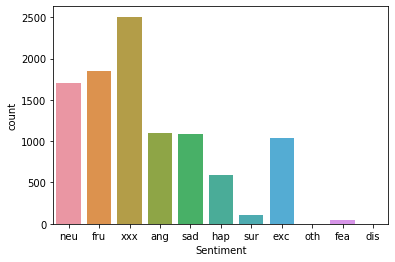

In [107]:

sns.countplot(x='Sentiment', data=corpus);

new = neutral |
fru = frustrated |
xxx = without information |
ang = angry |
sad = sad |
sur = surprised |
exc = excited |
oth = other |
fea = fearful |
dis = disgusted |

# Train Test Split

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(corpus['Transcription'], corpus['Sentiment'],
                                                    stratify=corpus['Sentiment'], 
                                                    test_size=0.25)